# classements badmania

https://badmania.fr/club-joueurs-2254-riom-badminton-club.html

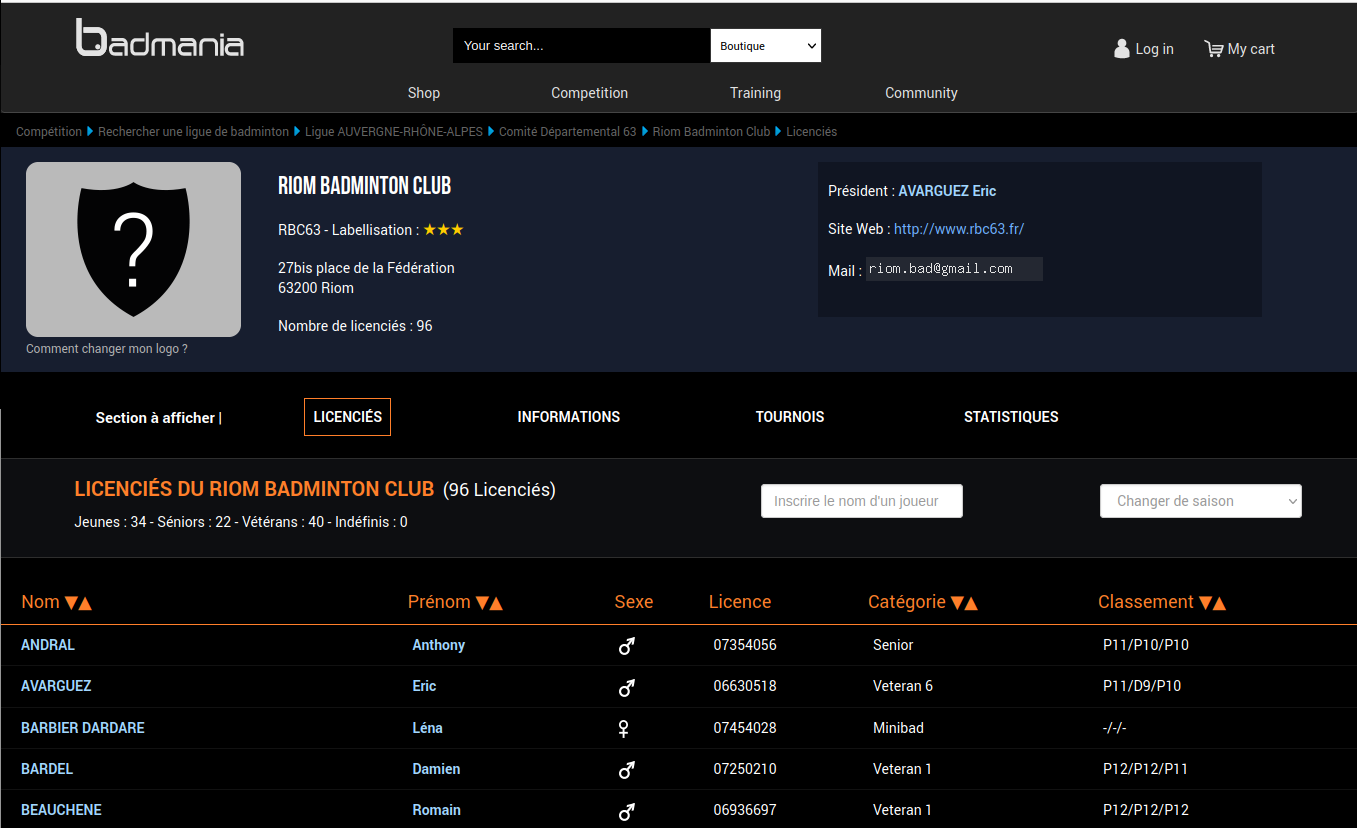

In [1]:
#|default_exp rbc

In [2]:
#| export
PAGE = 'https://badmania.fr/club-joueurs-2254-riom-badminton-club.html'

In [3]:
#| export
import pandas as pd
html_tables = pd.read_html(PAGE)
df_adherents = html_tables[0]

In [4]:
df_adherents.head()

,Nom ▼▲,Nom ▼▲.1,Prénom ▼▲,Prénom ▼▲.1,Sexe,Licence,Catégorie ▼▲,Classement ▼▲,Class.
0,ANDRAL,Anthony,ANDRAL,Anthony,NaN,7354056,Senior,P11/P10/P10,P11/P10/P10
1,AVARGUEZ,Eric,AVARGUEZ,Eric,NaN,6630518,Veteran 6,P11/D9/P10,P11/D9/P10
2,BARBIER DARDARE,Léna,BARBIER...,Léna,NaN,7454028,Minibad,-/-/-,-/-/-
3,BARDEL,Damien,BARDEL,Damien,NaN,7250210,Veteran 1,P12/P12/P11,P12/P12/P11
4,BEAUCHENE,Romain,BEAUCHENE,Romain,NaN,6936697,Veteran 1,P12/P12/P12,P12/P12/P12


In [5]:
df_adherents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nom ▼▲         96 non-null     object 
 1   Nom ▼▲.1       96 non-null     object 
 2   Prénom ▼▲      96 non-null     object 
 3   Prénom ▼▲.1    96 non-null     object 
 4   Sexe           0 non-null      float64
 5   Licence        96 non-null     int64  
 6   Catégorie ▼▲   93 non-null     object 
 7   Classement ▼▲  96 non-null     object 
 8   Class.         96 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ KB


# get_classement

In [6]:
#| export

def get_classement(
    license_number,# le numero de license
):
    classement_licencie = df_adherents[df_adherents['Licence'] == license_number]['Class.']
    return classement_licencie.values[0] if len(classement_licencie)>0 else ''

In [7]:
get_classement(7354056)

'P11/P10/P10'

In [8]:
get_classement(7)

''

In [9]:
get_classement(7454028)

'-/-/-'

# adherents fournis par le bureau

In [10]:
fichier_adherents = 'xls633be4e053e80.xlsx'

In [11]:
df_rbc_adherents = pd.read_excel(fichier_adherents)

In [12]:
df_rbc_adherents.head()

,Nom d'usage,Prénom,Licence,Date de naissance,Email de contact,Tél. de contact,Saison,Adhérent validé,Catégorie
0,AIGUADEL-JALEME,Pascal,7254760,01-10-1973,bosslaidealj@gmail.com,3.363477e+10,22-23,Oui,Veteran 3
1,ALONSO MARTINEZ,Lana,7451860,21-10-2006,lana-fred@hotmail.fr,NaN,22-23,Non,Junior 1
2,ANDRAL,Anthony,7354056,09-08-1989,anthonyandral@gmail.com,3.362213e+10,22-23,Oui,Senior
3,ASSELINEAU,Dorian,7354558,10-05-2010,karinecesar@gmail.com,3.368452e+10,22-23,Non,Minime 1
4,AURIERES,Vivien,7386012,21-09-1979,labidoche1@hotmail.fr,3.368702e+10,22-23,Oui,Veteran 2


# completes par les classements

In [13]:
df_rbc_adherents['Classement']= df_rbc_adherents['Licence'].apply(lambda x: get_classement(x))

In [14]:
df_rbc_adherents.head()

,Nom d'usage,Prénom,Licence,Date de naissance,Email de contact,Tél. de contact,Saison,Adhérent validé,Catégorie,Classement
0,AIGUADEL-JALEME,Pascal,7254760,01-10-1973,bosslaidealj@gmail.com,3.363477e+10,22-23,Oui,Veteran 3,
1,ALONSO MARTINEZ,Lana,7451860,21-10-2006,lana-fred@hotmail.fr,NaN,22-23,Non,Junior 1,
2,ANDRAL,Anthony,7354056,09-08-1989,anthonyandral@gmail.com,3.362213e+10,22-23,Oui,Senior,P11/P10/P10
3,ASSELINEAU,Dorian,7354558,10-05-2010,karinecesar@gmail.com,3.368452e+10,22-23,Non,Minime 1,
4,AURIERES,Vivien,7386012,21-09-1979,labidoche1@hotmail.fr,3.368702e+10,22-23,Oui,Veteran 2,


In [15]:
df_rbc_adherents.to_excel('classements_'+fichier_adherents)

# add_classements

In [16]:
#| export

def add_classements(dataframe, #le dataframe des adherents
                   ):
    dataframe = dataframe.copy()
    dataframe['Classement']= dataframe['Licence'].apply(lambda x: get_classement(x))
    return dataframe

In [17]:
add_classements(df_rbc_adherents)

,Nom d'usage,Prénom,Licence,Date de naissance,Email de contact,Tél. de contact,Saison,Adhérent validé,Catégorie,Classement
0,AIGUADEL-JALEME,Pascal,7254760,01-10-1973,bosslaidealj@gmail.com,3.363477e+10,22-23,Oui,Veteran 3,
1,ALONSO MARTINEZ,Lana,7451860,21-10-2006,lana-fred@hotmail.fr,NaN,22-23,Non,Junior 1,
2,ANDRAL,Anthony,7354056,09-08-1989,anthonyandral@gmail.com,3.362213e+10,22-23,Oui,Senior,P11/P10/P10
3,ASSELINEAU,Dorian,7354558,10-05-2010,karinecesar@gmail.com,3.368452e+10,22-23,Non,Minime 1,
4,AURIERES,Vivien,7386012,21-09-1979,labidoche1@hotmail.fr,3.368702e+10,22-23,Oui,Veteran 2,
...,...,...,...,...,...,...,...,...,...,...
149,VARAGNAT,Caroline,6911311,18-05-1992,caroline.varagnat@gmail.com,3.366256e+10,22-23,Oui,Senior,R6/D7/R6
150,VERMUSEAU,Fabrice,7400889,27-09-1995,fabrice.vermuseau@gmail.com,3.361689e+10,22-23,Oui,Senior,P12/P12/P12
151,VICARD,Lucette,492624,09-09-1970,jelp95@yahoo.fr,3.366088e+10,22-23,Oui,Veteran 4,P11/D9/D9
152,VIDAL,Nicolas,7428333,09-11-1993,nicovidal@orange.fr,3.365941e+10,22-23,Oui,Senior,NC/NC/NC


# Export rbc.rbc.py

In [18]:
#| hide

import nbdev; nbdev.export.nb_export('update_classement.ipynb', lib_path='.')